In [2]:
import sys
sys.path.insert(0, '../../../PyPlr')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyplr.CIE import get_CIES026
from pyplr.oceanops import predict_dark_counts, calibrated_radiance
from pyplr.stlab import CalibrationContext

In [52]:
plr_spectra = pd.read_csv('../data/PLR-3000_spectra.csv', index_col='uW')
plr_spectra.reset_index(drop=True, inplace=True)
plr_info = pd.read_csv('../data/PLR-3000_spectra_info.csv', index_col='uW')
plr_info.reset_index(drop=True, inplace=True)
darkcal = pd.read_table('../data/oo_dark_cal.txt', skiprows=2, index_col=False)
plr_dark_counts = predict_dark_counts(plr_info, darkcal)
cal_per_wl = pd.read_csv('../data/oo_calibration.csv', header=None)
sensor_area_cm2 = pd.read_csv('../data/oo_sensorArea.csv', header=None)

# Call function
wperm2pernm = calibrated_radiance(plr_spectra, plr_info, plr_dark_counts, cal_per_wl, sensor_area_cm2)
wperm2pernm

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.000511,0.000523,0.000502,0.000499,0.000441,0.000464,0.000478,0.000451,0.000485,0.000540,...,0.000946,0.000997,0.000946,0.000933,0.000961,0.000909,0.000863,0.000873,0.000858,0.000899
1,0.000408,0.000364,0.000368,0.000423,0.000379,0.000359,0.000381,0.000354,0.000381,0.000389,...,0.000658,0.000705,0.000681,0.000642,0.000662,0.000624,0.000639,0.000550,0.000609,0.000622
2,0.000217,0.000215,0.000228,0.000224,0.000217,0.000219,0.000197,0.000217,0.000225,0.000205,...,0.000555,0.000568,0.000574,0.000582,0.000573,0.000578,0.000577,0.000513,0.000592,0.000592
3,0.000039,0.000001,0.000033,0.000030,0.000049,0.000051,0.000040,0.000060,0.000048,0.000030,...,0.000181,0.000175,0.000186,0.000192,0.000181,0.000194,0.000194,0.000125,0.000198,0.000193


<AxesSubplot:>

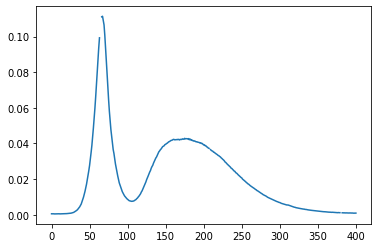

In [61]:
wperm2pernm.loc[0].plot()